# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
# импорт нужных библиотек

import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
# загрузим данные и посмотрим на структуру таблицы
df_telecom_users = pd.read_csv("telecom_users.csv")
df_telecom_users.head(5)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


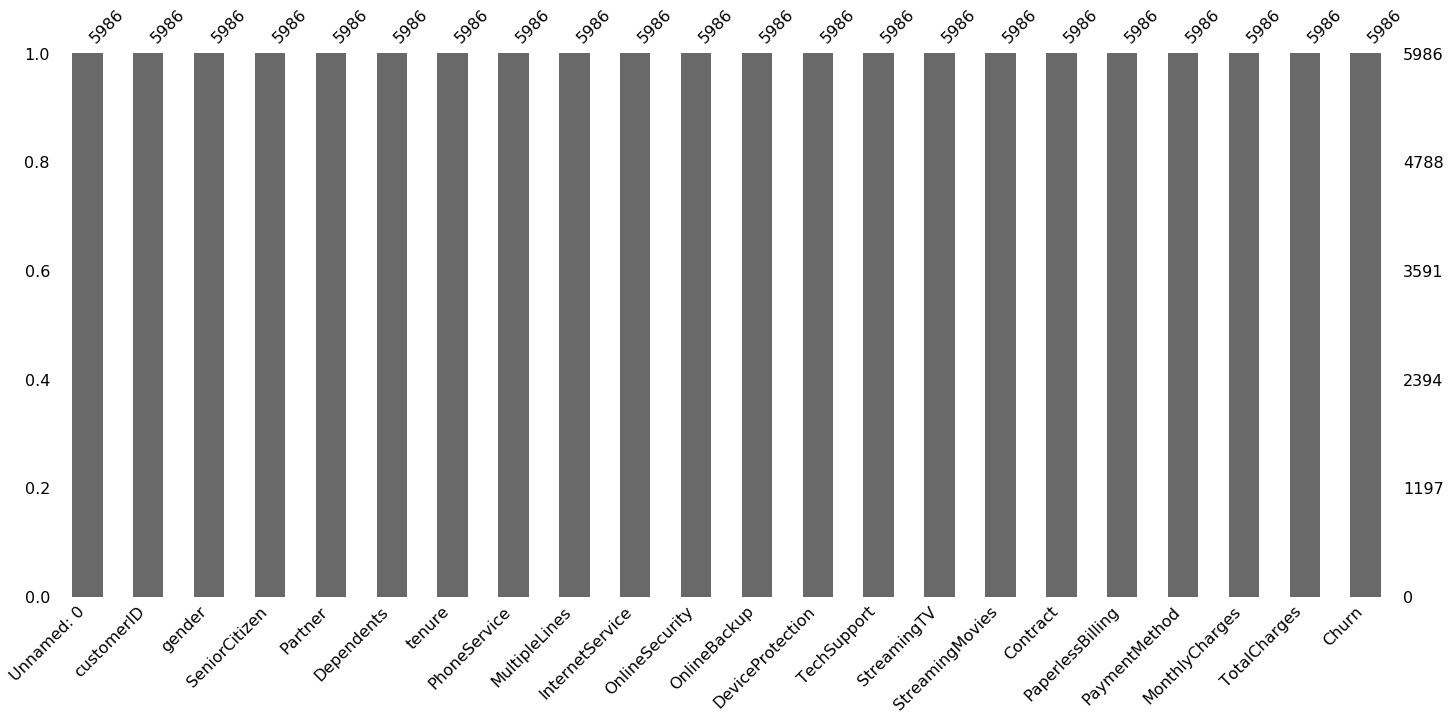

In [3]:
# посмотрим на наличие пропущенных значений
msno.bar(df_telecom_users)

Пропущенных значений нет, если бы были можно было их восстановить или заполнить медианой.

In [4]:
# посмотрим типы данных фичей
df_telecom_users.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Видим большое кол-во категориальных признаков, значит нужно будет кодировать значения

In [5]:
# посмотрим числовые признаки
df_telecom_users.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213
std,2035.705666,0.367909,24.516391,30.114702
min,0.000000,0.000000,0.000000,18.250000
25%,1777.250000,0.000000,9.000000,35.650000
50%,3546.500000,0.000000,29.000000,70.400000
75%,5291.750000,0.000000,56.000000,89.900000
max,7042.000000,1.000000,72.000000,118.750000


* видим, что Unnamed: 0 - это какие то индексы (пока не удаляем), SeniorCitizen - это бинарный признак, 
* tenure, MonthlyCharges - медиана стремится к среднему значению, распределение стремится к нормальному, std имеет высокое значение, что говорит о большом разбросе выборки вокруг среднего значения

In [6]:
# посмотрим теперь категориальные признаки
df_telecom_users.describe(include=[np.object])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5611,2
top,4299-SIMNS,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,10,4399


Рассмотрим нецелевые признаки:
* видим, что все абоненты у нас уникальные
* мужчины преобладают (чуть больше половины), пол бинарный признак
* более половины абонентов не в браке и две трети не имеют иждевенцев, 
* почти все пользуются услугой телефоннии, тоже бинарный признак
* абоненты чаще не используются мультилинией, онлайн защитой, бекапами, защитой девайса,техподдержкой - номинальные признаки
* чуть меньше половины пользуются оптикой, номинальный признак
* более 2000 не пользуются стриминговым тв и фильмами, номинальные признаки
* больше половины абонентов на ежемесячном контракте, номинальный признак
* более 3500 клиентов хочет получать бумажную квитанцию, бинарный признак
* самый популярный способ оплаты электронный чек, номинальный признак

* мы видим, что более двух третих это живые клиенты, бинарный признак - он же целевой для нас

Так же видим проблему с данными в TotalCharges, поидеи это количественный признак, но он попал к номинальным, так еще и видим, что самое частое значение пустой объект.

Нужно преобразовать номинальные признаки в числовые, и разобраться с TotalCharges

# 2. Исследование зависимостей и формулирование гипотез

#### 1. Churn

Для дальнеших иследований, давайте сделаем числовым целевой бинарный признак.

In [7]:
# Churn Yes, No для лучшей интепритируемости, если отток произошел, то будем ставить 1, если нет, то 0
df_telecom_users['Churn'].replace(['Yes', 'No'], [1, 0], inplace=True)

#### 2. TotalCharges

In [8]:
# заменим пустую строку на nan, найдем медиану и восстановим пропущенные значения медианой
df_telecom_users['TotalCharges'].replace(' ', np.nan, inplace=True)
median_total_charges = df_telecom_users['TotalCharges'].dropna().astype('Float64').median()

In [9]:
df_telecom_users['TotalCharges'].fillna(median_total_charges, inplace=True)
df_telecom_users['TotalCharges'] = df_telecom_users['TotalCharges'].astype('Float64')

In [10]:
# посмотрим разброс значений
df_telecom_users['TotalCharges'].describe()

count    5986.000000
mean     2296.580647
std      2272.514574
min        18.800000
25%       406.275000
50%      1412.150000
75%      3841.500000
max      8684.800000
Name: TotalCharges, dtype: float64

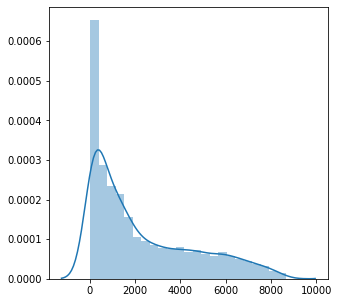

In [11]:
plt.figure(figsize=(5,5))
sns.distplot(df_telecom_users['TotalCharges'], axlabel=False)
plt.show()

Видим сильный разброс значений, сильный правый хвост, переведем числовой признак в категориальный и обозначим категории цифрами

In [12]:
df_telecom_users['CatTotalCharges'] = pd.qcut(df_telecom_users['TotalCharges'], 5)
df_telecom_users[['CatTotalCharges', 'Churn']].groupby('CatTotalCharges', as_index=False).mean()

,CatTotalCharges,Churn
0,"(18.799, 272.0]",0.463272
1,"(272.0, 950.75]",0.284043
2,"(950.75, 2070.75]",0.201337
3,"(2070.75, 4512.7]",0.232247
4,"(4512.7, 8684.8]",0.144528


Видим, что чем выше сумма всех оплат, тем меньше процент оттока, в категории 4, составляет всего 14%, но и значимость потери абнонента растет с номером категории.

In [13]:
# применим категории 0-4
df_telecom_users.loc[df_telecom_users['TotalCharges'] <= 270.8, 'TotalCharges'] = 0
df_telecom_users.loc[(df_telecom_users['TotalCharges'] > 270.8) & (df_telecom_users['TotalCharges'] <= 948.9), 'TotalCharges'] = 1
df_telecom_users.loc[(df_telecom_users['TotalCharges'] > 948.9) & (df_telecom_users['TotalCharges'] <= 2077.95), 'TotalCharges'] = 2
df_telecom_users.loc[(df_telecom_users['TotalCharges'] > 2077.95) & (df_telecom_users['TotalCharges'] <= 4515.85), 'TotalCharges'] = 3
df_telecom_users.loc[(df_telecom_users['TotalCharges'] > 4515.85) & (df_telecom_users['TotalCharges'] <= 8684.8), 'TotalCharges'] = 4
df_telecom_users['TotalCharges'] = df_telecom_users['TotalCharges'].astype(int)

#### 3. Unnamed: 0, customerID

Посмотрев эти признаки принял решение удалить их. Не понятный столбец (скорее всего индексный) и ИД клиента - нам не помогут. (все обозначения уникальные)

In [14]:
# сохраним список абонентов
customerID = df_telecom_users['customerID']
# удалим лишние столбцы
df_telecom_users = df_telecom_users.drop(['Unnamed: 0', 'customerID'], axis=1)

#### 4. tenure

In [15]:
df_telecom_users['сat_tenure'] = pd.qcut(df_telecom_users['tenure'], 5)
df_telecom_users[['сat_tenure', 'Churn']].groupby('сat_tenure', as_index=False).mean()

,сat_tenure,Churn
0,"(-0.001, 6.0]",0.533708
1,"(6.0, 20.0]",0.323505
2,"(20.0, 40.0]",0.225188
3,"(40.0, 60.0]",0.164797
4,"(60.0, 72.0]",0.064435


Видим, что чем дольше абонент пользуется услугами, тем меньше процент отвала.

In [16]:
# применим категории 0-4
df_telecom_users.loc[df_telecom_users['tenure'] <= 6.0, 'tenure'] = 0
df_telecom_users.loc[(df_telecom_users['tenure'] > 6.0) & (df_telecom_users['tenure'] <= 20.0), 'tenure'] = 1
df_telecom_users.loc[(df_telecom_users['tenure'] > 20.0) & (df_telecom_users['tenure'] <= 40.0), 'tenure'] = 2
df_telecom_users.loc[(df_telecom_users['tenure'] > 40.0) & (df_telecom_users['tenure'] <= 60.0), 'tenure'] = 3
df_telecom_users.loc[(df_telecom_users['tenure'] > 60.0) & (df_telecom_users['tenure'] <= 72.0), 'tenure'] = 4
df_telecom_users['tenure'] = df_telecom_users['tenure'].astype(int)

#### 5. MonthlyCharges

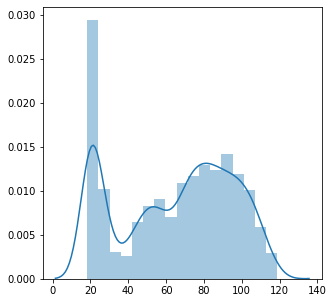

In [17]:
plt.figure(figsize=(5,5))
sns.distplot(df_telecom_users['MonthlyCharges'], axlabel=False)
plt.show()

На графике видно, что есть три категории, те кто пользуются базовыми тарифами (самый популярный), середина и те кто потребляют выше среднего (самые маржинальные абоненты).

In [18]:
df_telecom_users['CatMonthlyCharges'] = pd.qcut(df_telecom_users['MonthlyCharges'], 3)
df_telecom_users[['CatMonthlyCharges', 'Churn']].groupby('CatMonthlyCharges', as_index=False).mean()

,CatMonthlyCharges,Churn
0,"(18.249, 50.35]",0.163082
1,"(50.35, 84.0]",0.298395
2,"(84.0, 118.75]",0.334170


Так, а тут видим обратную ситуацию, как только абонент начинает повышать размер ежемесячного платежа, что связано с потреблением различных дополнительных услуг, процент отвала увеличивается. Это сигнал разобраться, что происходит с допами, почему абоненты уходят, в самом маржинальном сегменте.

In [19]:
# применим категории 0-2
df_telecom_users.loc[df_telecom_users['MonthlyCharges'] <= 50.35, 'MonthlyCharges'] = 0
df_telecom_users.loc[(df_telecom_users['MonthlyCharges'] > 50.35) & (df_telecom_users['MonthlyCharges'] <= 84.0), 'MonthlyCharges'] = 1
df_telecom_users.loc[(df_telecom_users['MonthlyCharges'] > 84.0) & (df_telecom_users['MonthlyCharges'] <= 118.75), 'MonthlyCharges'] = 2
df_telecom_users['MonthlyCharges'] = df_telecom_users['MonthlyCharges'].astype(int)

#### 6. gender

In [20]:
gender_f = df_telecom_users[df_telecom_users['gender']== 'Female']['gender'].count()
gender_m = df_telecom_users[df_telecom_users['gender']== 'Male']['gender'].count()
gender_label = ['FEMALE', 'MALE']

(-1.1065240160605885,
 1.1003106674314567,
 -1.1040998621710845,
 1.107871834311666)

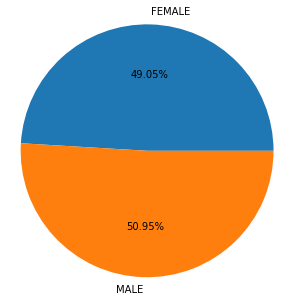

In [21]:
fig, ax = plt.subplots(figsize=(5, 5))
# mpl.rcParams.update({'font.size': 30})
ax.pie([gender_f, gender_m], labels=gender_label, autopct='%1.2f%%')
ax.axis("equal")

In [22]:
df_telecom_users[['gender', 'Churn']].groupby('gender', as_index=False).mean()

,gender,Churn
0,Female,0.269414
1,Male,0.260984


У нас равный гендерный состав, и видим, что отвал одинаковый, значит позиционирования услуг по полу нет или оно не работает.

In [23]:
# gender - male: 1, femal: 0
df_telecom_users['gender'].replace(['Male', 'Female'], [1, 0], inplace=True)
df_telecom_users['gender'] = df_telecom_users['gender'].astype(int)

#### 7. Partner, Dependents

In [24]:
df_telecom_users[['Partner', 'Churn']].groupby('Partner', as_index=False).mean()

,Partner,Churn
0,No,0.328034
1,Yes,0.198347


In [25]:
partner_yes = df_telecom_users[df_telecom_users['Partner']== 'No']['Partner'].count()
partner_no = df_telecom_users[df_telecom_users['Partner']== 'Yes']['Partner'].count()
partner_label = ['No', 'Yes']

(-1.1086689213658252, 1.100412805779325, -1.106031225611443, 1.111718159000757)

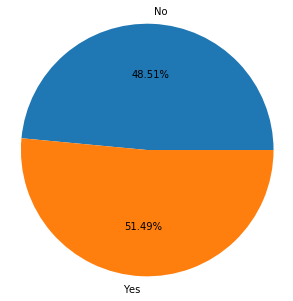

In [26]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie([partner_no, partner_yes], labels=partner_label, autopct='%1.2f%%')
ax.axis("equal")

In [27]:
df_telecom_users[['Dependents', 'Churn']].groupby('Dependents', as_index=False).mean()

,Dependents,Churn
0,No,0.311323
1,Yes,0.156896


In [28]:
dependents_yes = df_telecom_users[df_telecom_users['Dependents']== 'No']['Dependents'].count()
dependents_no = df_telecom_users[df_telecom_users['Dependents']== 'Yes']['Dependents'].count()
dependents_label = ['No', 'Yes']

(-1.1174928414086946,
 1.1008329924480331,
 -1.1127949541669173,
 1.1134913874679904)

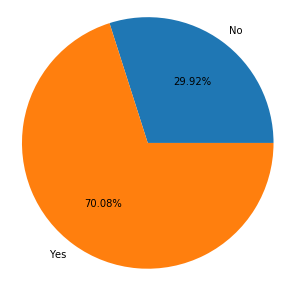

In [29]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie([dependents_no, dependents_yes], labels=dependents_label, autopct='%1.2f%%')
ax.axis("equal")

Получается, если абонент холост и не имеет иждивенцев, то решение об отказе услуг принимает чаще, но при этом достаточно большой отвал и среди абонентов с партнерами (16%) и среди абонентов с иждевенцами (19%).

#### 8. InternetService

In [30]:
df_telecom_users[['InternetService', 'Churn']].groupby('InternetService', as_index=False).mean()

,InternetService,Churn
0,DSL,0.191973
1,Fiber optic,0.415303
2,No,0.076685


In [31]:
internet_dsl = df_telecom_users[df_telecom_users['InternetService']== 'DSL']['InternetService'].count()
internet_optic = df_telecom_users[df_telecom_users['InternetService']== 'Fiber optic']['InternetService'].count()
internet_no = df_telecom_users[df_telecom_users['InternetService']== 'No']['InternetService'].count()
internet_label = ['DSL', 'Fiber optic', 'No']

(-1.1263494555806557,
 1.1012547807041115,
 -1.1282525413474274,
 1.11053244061238)

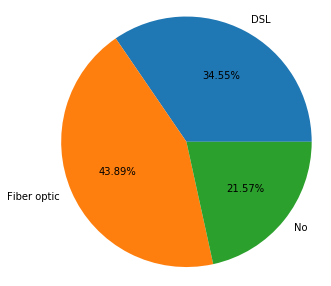

In [32]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie([internet_dsl, internet_optic, internet_no], labels=internet_label, autopct='%1.2f%%')
ax.axis("equal")

Так вот тут явная проблема с оптикой, она является основным типом услуги интернет, и это главная технология, при этом процент отвала катострафический. Нужно срочно разбираться в причинах, качества ли это услуги или ее дороговизна по отношению к конкурентам. Так как это DSL умирает как технология, если не исправить ситуацию можно потерять компанию.

#### 9. Contract

In [33]:
df_telecom_users[['Contract', 'Churn']].groupby('Contract', as_index=False).mean()

,Contract,Churn
0,Month-to-month,0.427654
1,One year,0.115987
2,Two year,0.028452


In [34]:
contract_mtm = df_telecom_users[df_telecom_users['Contract']== 'Month-to-month']['Contract'].count()
contract_y = df_telecom_users[df_telecom_users['Contract']== 'One year']['Contract'].count()
contract_yy = df_telecom_users[df_telecom_users['Contract']== 'Two year']['Contract'].count()
contract_label = ['Month-to-month', 'One year', 'Two year']

(-1.110752382768061,
 1.1005120182270505,
 -1.1125036935310944,
 1.1113264761931285)

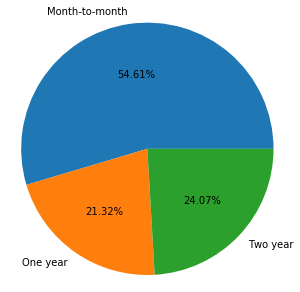

In [35]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie([contract_mtm, contract_y, contract_yy], labels=contract_label, autopct='%1.2f%%')
ax.axis("equal")

Логично, что если оплата ежемесячная, то и сменить провайдера проще, но процент отвала более 40%, существенная проблема.
Среди абонентов на длинном контракте процент отвала меньше.

In [36]:
df_telecom_users[['Contract', 'InternetService', 'Churn']].groupby(['Contract', 'InternetService']).mean()

Churn
Contract       InternetService          
Month-to-month DSL              0.328530
               Fiber optic      0.541899
               No               0.196347
One year       DSL              0.093306
               Fiber optic      0.200426
               No               0.025478
Two year       DSL              0.016854
               Fiber optic      0.073370
               No               0.009276

Обратим внимание, что гипотеза с качеством оптики, подверждается, абонент покупает услугу 'Fiber optic'(2) по контракту 'Month-to-month'(1) и его катострафически не устраивает, что то, отвал более 50%. Так же, если качество современной услуги не устраивает, то у абонентов на DSL тоже нет выбора, приходится менять оператора. Сарафанное радио так же создает репутацию компании.

#### 10. PhoneService, MultipleLines

In [37]:
df_telecom_users[['PhoneService', 'InternetService', 'MultipleLines', 'Churn']].groupby(['InternetService', 'PhoneService', 'MultipleLines']).mean()

Churn
InternetService PhoneService MultipleLines             
DSL             No           No phone service  0.252542
                Yes          No                0.212190
                             Yes               0.101351
Fiber optic     Yes          No                0.453886
                             Yes               0.392900
No              Yes          No                0.089268
                             Yes               0.034014

Если оценивать отвал в разрезе каждого значения PhoneService и MultipleLines, то результат примерно одинаковый, но если посмотреть с привязкой к услугам интернет, то опять видим, что большой отвал среди абонентов использующих оптику, но при этом, абобненты, которые пользуются только телефоном в целом довольны услугой.

In [38]:
df_telecom_users[['PhoneService', 'InternetService', 'Churn']].groupby(['InternetService', 'PhoneService']).mean()

Churn
InternetService PhoneService          
DSL             No            0.252542
                Yes           0.167794
Fiber optic     Yes           0.415303
No              Yes           0.076685

Так же заметно, что отвал больше у тех, кто не пользуется телефоном, но пользуется интернетом DSL.

In [39]:
phone_yes = df_telecom_users[df_telecom_users['PhoneService']== 'Yes']['PhoneService'].count()
phone_no = df_telecom_users[df_telecom_users['PhoneService']== 'No']['PhoneService'].count()
phone_label = ['Yes', 'No']

(-1.1044747083696609,
 1.1002130813509363,
 -1.1076084721685224,
 1.106943545249966)

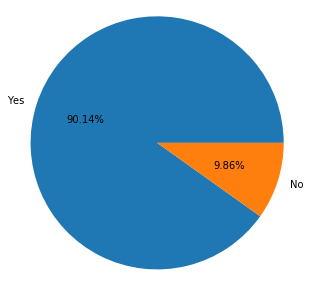

In [40]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie([phone_yes, phone_no], labels=phone_label, autopct='%1.2f%%')
ax.axis("equal")

In [41]:
multiphone_yes = df_telecom_users[df_telecom_users['MultipleLines']== 'Yes']['MultipleLines'].count()
multiphone_no = df_telecom_users[df_telecom_users['MultipleLines']== 'No']['MultipleLines'].count()
multiphone_no_phone = df_telecom_users[df_telecom_users['MultipleLines']== 'No phone service']['MultipleLines'].count()
multiphone_label = ['Yes', 'No', 'No phone service']

Большинство абонентов пользуются услугами телефонии.

(-1.1322160046351495,
 1.1015340954588166,
 -1.1330797218787811,
 1.1276682323643656)

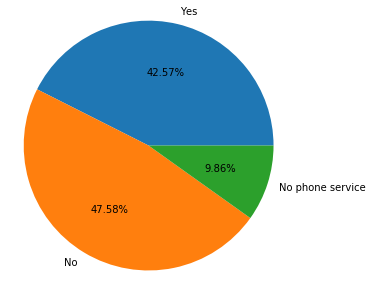

In [42]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie([multiphone_yes, multiphone_no, multiphone_no_phone], labels=multiphone_label, autopct='%1.2f%%')
ax.axis("equal")

Почти половина использует больше одного телефона.

#### 11. Дополнительные интернет опции

In [43]:
# OnlineSecurity Yes, No, No internet service
df_telecom_users['OnlineSecurity'].replace(['No internet service', 'No', 'Yes'], [2, 1, 0], inplace=True)

# OnlineBackup Yes, No, No internet service
df_telecom_users['OnlineBackup'].replace(['No internet service', 'No', 'Yes'], [2, 1, 0], inplace=True)

# DeviceProtection Yes, No, No internet service
df_telecom_users['DeviceProtection'].replace(['No internet service', 'No', 'Yes'], [2, 1, 0], inplace=True)

# TechSupport Yes, No, No internet service
df_telecom_users['TechSupport'].replace(['No internet service', 'No', 'Yes'], [2, 1, 0], inplace=True)

# StreamingTV Yes, No, No internet service
df_telecom_users['StreamingTV'].replace(['No internet service', 'No', 'Yes'], [2, 1, 0], inplace=True)

# StreamingMovies Yes, No, No internet service
df_telecom_users['StreamingMovies'].replace(['No internet service', 'No', 'Yes'], [2, 1, 0], inplace=True)

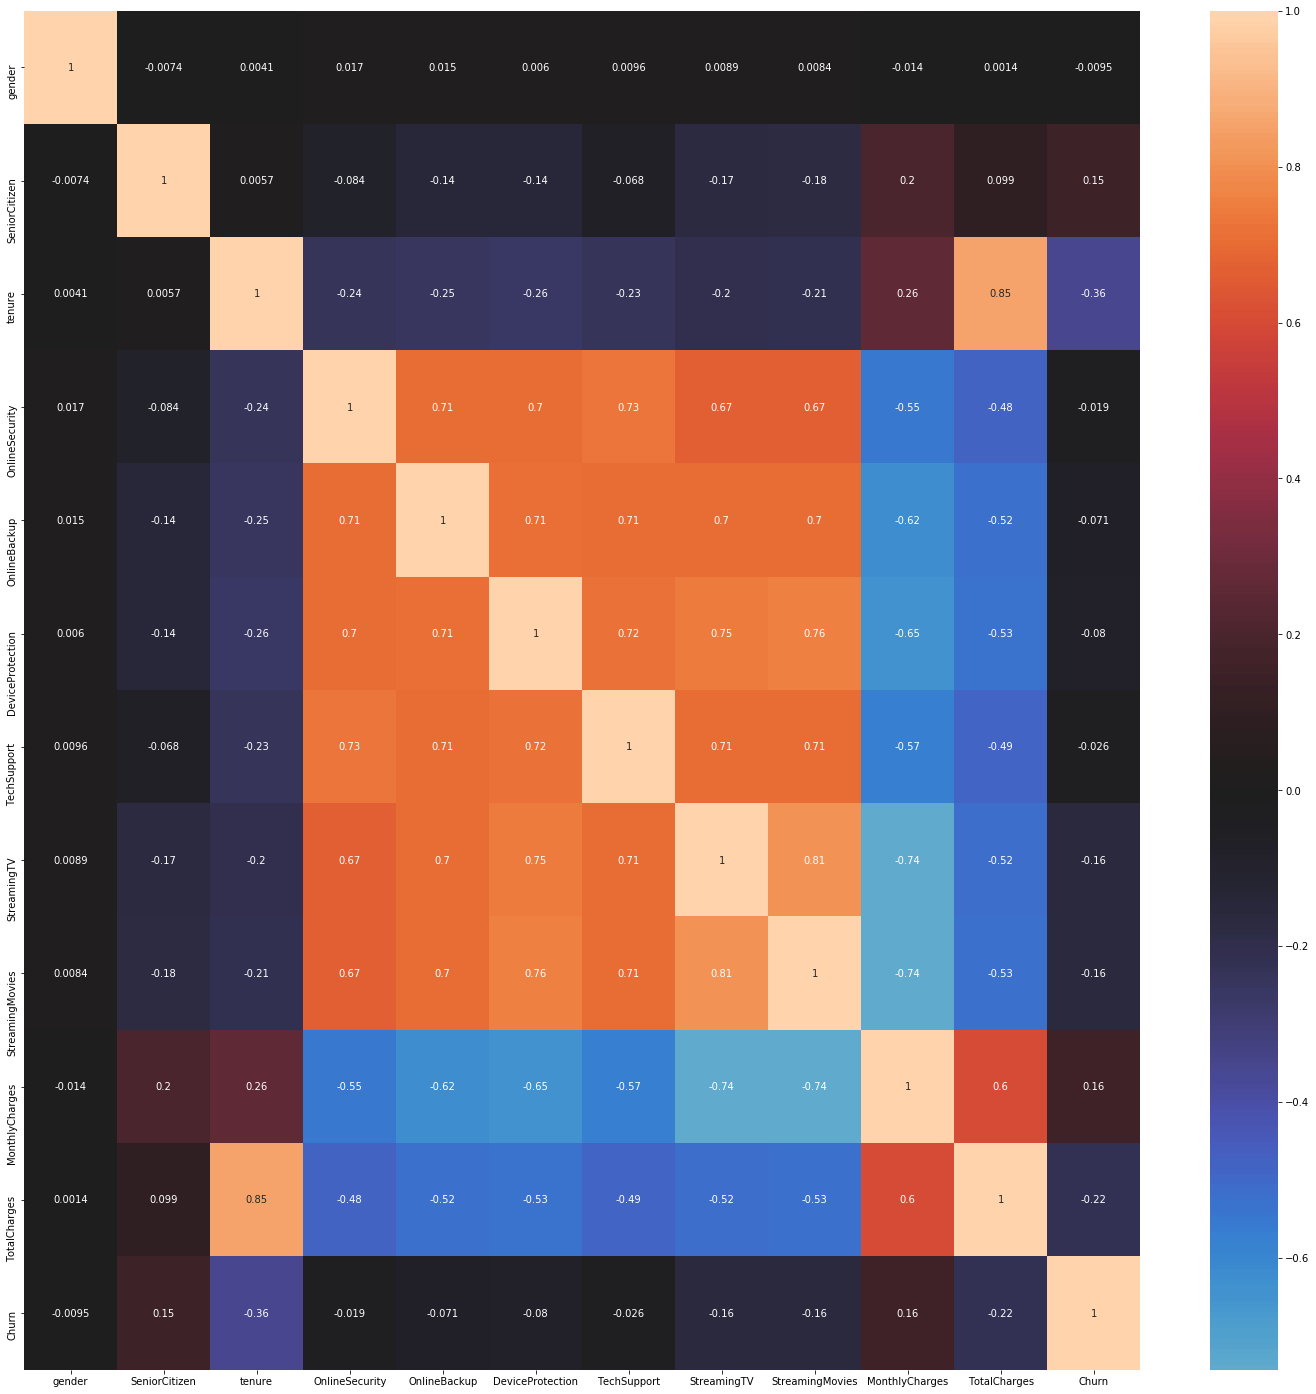

In [44]:
corr_m = df_telecom_users.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr_m, center=0, annot=True)

Все дополнительные сервисы коррелируют между собой, и имеют большую линейную зависимость и высокую обратную корреляцию с интернет. И так понятно, что если качество оптики слабое, то и сервисы будут работать плохо.

#### 12. PaperlessBilling

In [45]:
df_telecom_users[['PaperlessBilling', 'Churn']].groupby('PaperlessBilling').mean()

,Churn
PaperlessBilling,
No,0.165175
Yes,0.334751


In [46]:
paper_yes = df_telecom_users[df_telecom_users['PaperlessBilling']== 'Yes']['PaperlessBilling'].count()
paper_no = df_telecom_users[df_telecom_users['PaperlessBilling']== 'No']['PaperlessBilling'].count()
paper_label = ['Yes', 'No']

(-1.110923470460972,
 1.1005201652600463,
 -1.1225524077855251,
 1.1131550137204211)

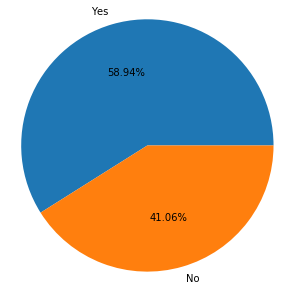

In [47]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie([paper_yes, paper_no], labels=paper_label, autopct='%1.2f%%')
ax.axis("equal")

Большинство абонентов пользуются бумажными счетами, и отвал в этом случае больше в два раза.

#### 13. PaymentMethod

In [48]:
df_telecom_users[['PaymentMethod', 'Churn']].groupby('PaymentMethod').mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.171254
Credit card (automatic),0.151957
Electronic check,0.449651
Mailed check,0.192111


In [49]:
payment_bank = df_telecom_users[df_telecom_users['PaymentMethod']== 'Bank transfer (automatic)']['PaymentMethod'].count()
payment_card = df_telecom_users[df_telecom_users['PaymentMethod']== 'Credit card (automatic)']['PaymentMethod'].count()
payment_el_check = df_telecom_users[df_telecom_users['PaymentMethod']== 'Electronic check']['PaymentMethod'].count()
payment_mailed_check = df_telecom_users[df_telecom_users['PaymentMethod']== 'Mailed check']['PaymentMethod'].count()
payment_label = ['Bank', 'Credit card', 'Electronic check', 'Mailed check']

(-1.114932109786009, 1.1007110528469528, -1.116621724951226, 1.127746114810826)

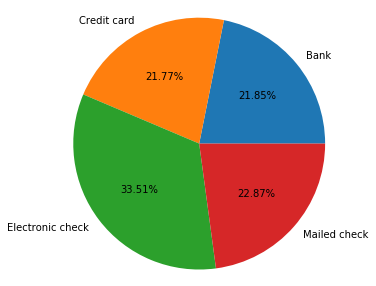

In [50]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie([payment_bank, payment_card, payment_el_check, payment_mailed_check], labels=payment_label, autopct='%1.2f%%')
ax.axis("equal")

Получается, что треть абонентов использует электронные чеки для платежей, но при этом отвал у них составляет 44%, тут явно есть проблема. Возможно проблема с прохождением платежа.

In [51]:
df_telecom_users[['PaymentMethod', 'Churn', 'tenure']].groupby(['PaymentMethod', 'tenure']).count()

Churn
PaymentMethod             tenure       
Bank transfer (automatic) 0         103
                          1         194
                          2         258
                          3         324
                          4         429
Credit card (automatic)   0         107
                          1         189
                          2         265
                          3         300
                          4         442
Electronic check          0         574
                          1         468
                          2         400
                          3         354
                          4         210
Mailed check              0         462
                          1         336
                          2         276
                          3         181
                          4         114

In [52]:
df_telecom_users[['PaymentMethod', 'Churn', 'tenure']].groupby(['PaymentMethod', 'tenure']).mean()

Churn
PaymentMethod             tenure          
Bank transfer (automatic) 0       0.553398
                          1       0.278351
                          2       0.174419
                          3       0.154321
                          4       0.041958
Credit card (automatic)   0       0.429907
                          1       0.248677
                          2       0.177358
                          3       0.113333
                          4       0.054299
Electronic check          0       0.670732
                          1       0.500000
                          2       0.380000
                          3       0.274011
                          4       0.161905
Mailed check              0       0.383117
                          1       0.145833
                          2       0.094203
                          3       0.055249
                          4       0.008772

Из таблиц выше видно, что абоненты с методом платежа 'Bank transfer (automatic)', 'Credit card (automatic)' остаются абонентами длительный период, и отток снижается со времнем до минимальных значений. Поэтому преобладают по кол-ву абоненты, которые находятся больше 40 месяцев с компанией.

Обратная ситуация с чеками, видим, что достаточно мало абонентов остается с компанией с этими способами оплаты, многие отваливаются в первые полгода.

Значит этот признак можно использовать для прогнозирования.

In [53]:
# Partner - Yes: 0, No: 1
df_telecom_users['Partner'].replace(['No', 'Yes'], [1, 0], inplace=True)

# Dependents - Yes: 0, No: 1
df_telecom_users['Dependents'].replace(['No', 'Yes'], [1, 0], inplace=True)

# InternetService - DSL, Fiber optic, No
df_telecom_users['InternetService'].replace(['Fiber optic', 'DSL', 'No'], [2, 1, 0], inplace=True)

# Contract Month-to-month, One year, Two year
df_telecom_users['Contract'].replace(['Month-to-month', 'One year', 'Two year'], [1, 2, 0], inplace=True)

# PaperlessBilling Yes, No
df_telecom_users['PaperlessBilling'].replace(['Yes', 'No'], [1, 0], inplace=True)


# PaymentMethod Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)
df_telecom_users['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', \
                                           'Credit card (automatic)'], [1, 2, 3, 0], inplace=True)

# PhoneService Yes, No
df_telecom_users['PhoneService'].replace(['Yes', 'No'], [1, 0], inplace=True)

# MultipleLines Yes, No
df_telecom_users['MultipleLines'].replace(['Yes', 'No', 'No phone service'], [1, 2, 0], inplace=True)

In [54]:
# Я пробывал сократить кол-во признаков, но модели показывали худшую точность,
# поэтому оставил почти все изначальные признаки

# df_telecom_users = df_telecom_users.drop(['gender', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', \
#                                          'TechSupport', 'StreamingTV', 'StreamingMovies', 'CatTotalCharges', \
#                                           'сat_tenure', 'CatMonthlyCharges'], axis=1)
# df_telecom_users = df_telecom_users.drop(['SeniorCitizen', 'Partner', 'Dependents', 'tenure','InternetService', 'OnlineBackup','DeviceProtection','PaperlessBilling', 'PaymentMethod', 'MonthlyCharges','TotalCharges'], axis=1)

In [55]:
# уберем технические колонки
df_telecom_users = df_telecom_users.drop([ 'CatTotalCharges', 'сat_tenure', 'CatMonthlyCharges'], axis=1)

In [56]:
df_telecom_users.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,0,4,1,1,0,2,2,2,2,2,2,0,0,0,0,2,0
1,0,0,1,1,3,1,2,2,1,0,0,1,0,1,1,1,0,2,3,0
2,0,1,0,1,2,1,1,2,1,1,1,1,1,1,1,1,3,1,3,1
3,1,0,1,1,0,1,2,1,1,1,1,1,1,0,1,1,1,1,0,0
4,1,0,1,1,0,1,2,1,0,1,0,1,1,1,1,0,1,1,0,0


In [57]:
targets = df_telecom_users['Churn']
data = df_telecom_users.drop('Churn', axis=1)

# 3. Построение моделей для прогнозирования оттока

In [58]:
# импортируем нужные методы
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

In [59]:
# разобьем датасет на тренировочные и тестовые значения
x_train, x_test, y_train, y_test = train_test_split(data, 
                                                    targets,
                                                    test_size=0.30,
                                                    random_state=17)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [60]:
# проверим значимость признаков с помощью RFC классификатора

feat_labels = data.columns[0:]
forest = RandomForestClassifier(n_estimators=500, random_state=17)
forest.fit(x_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

 1) tenure                         0.118608
 2) PaymentMethod                  0.097134
 3) TotalCharges                   0.079970
 4) Contract                       0.077311
 5) InternetService                0.058838
 6) gender                         0.055859
 7) OnlineSecurity                 0.048191
 8) OnlineBackup                   0.047634
 9) Partner                        0.046765
10) DeviceProtection               0.046318
11) MultipleLines                  0.045733
12) PaperlessBilling               0.044584
13) TechSupport                    0.043982
14) StreamingMovies                0.042053
15) StreamingTV                    0.038785
16) SeniorCitizen                  0.037440
17) Dependents                     0.033566
18) MonthlyCharges                 0.030438
19) PhoneService                   0.006790


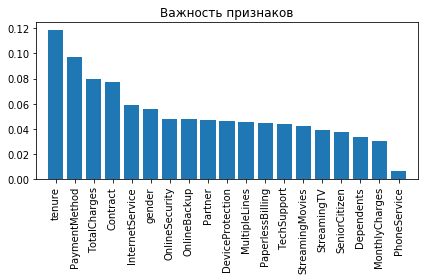

In [61]:
# Выведем получившийся результат
labels = []
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
    feat_labels[indices[f]],
    importances[indices[f]]))
    labels.append(feat_labels[indices[f]])
    
plt.title('Важность признаков')
plt.bar(range(x_train.shape[1]), importances[indices], align='center')
plt.xticks(range(x_train.shape[1]), labels, rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.tight_layout()
plt.show()

На картинке видно, что большая часть признаков оказывает слабое влияние на результат

In [62]:
# сделаем отбор признаков по критерию в 0.05

sfm = SelectFromModel(forest, threshold=0.05, prefit=True)
x_selected = sfm.transform(x_train)

print('Количество образцов, удолетворяющих данному критерию:',
     x_selected.shape[0])
labels = []

for f in range(x_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
    feat_labels[indices[f]],
    importances[indices[f]]))
    labels.append(feat_labels[indices[f]])

Количество образцов, удолетворяющих данному критерию: 4190
 1) tenure                         0.118608
 2) PaymentMethod                  0.097134
 3) TotalCharges                   0.079970
 4) Contract                       0.077311
 5) InternetService                0.058838
 6) gender                         0.055859


In [63]:
# сделаем новый датасет только из начимых признаков
data = data[labels]

In [64]:
# разобьем датасет на тренировочные и тестовые значения
x_train, x_test, y_train, y_test = train_test_split(data, 
                                                    targets,
                                                    test_size=0.30,
                                                    random_state=17)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [65]:
# алгоритмы и параметры взял из домашней работы по Титанику

gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)} # GradientBoostingClassifier

rfc_params = {'n_estimators': range(10, 100, 10), # RandomForestClassifier
              'min_samples_leaf': range(1, 5)}

svc_params = {'kernel': ['linear', 'rbf'], # SVC
              'C': np.arange(0.1, 1, 0.2)}

lr_params = {'penalty': ['l1', 'l2'],
             'C': np.arange(0.5, 1, 0.1)} # LogisticRegression
knn_params = {'n_neighbors': range(1, 20),
             'weights': ['uniform','distance']}
dtc_params = {'max_depth': range(1, 6), 
               'max_features': range(1, 10)}

In [66]:
# сделаем поиск лучших параметров алгоритмов классификации, обучим модели на этих параметрах.

rfc = RandomForestClassifier(random_state=17)
grid_search = GridSearchCV(rfc, param_grid=rfc_params, cv=skf, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_rfc = RandomForestClassifier(**best_params)
best_params

{'min_samples_leaf': 4, 'n_estimators': 90}

In [67]:
best_rfc.fit(x_train, y_train)
best_rfc_pred = best_rfc.predict(x_test)

In [68]:
gbc = GradientBoostingClassifier(random_state=17)
grid_search = GridSearchCV(gbc, param_grid=gbc_params, cv=skf, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_gbc = GradientBoostingClassifier(**best_params)
best_params

{'learning_rate': 0.2}

In [69]:
best_gbc.fit(x_train, y_train)
best_gbc_pred = best_gbc.predict(x_test)

In [70]:
svc = SVC(random_state=17)
grid_search = GridSearchCV(svc, param_grid=svc_params, cv=skf, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_svc = SVC(**best_params)
best_params

{'C': 0.30000000000000004, 'kernel': 'linear'}

In [71]:
best_svc.fit(x_train, y_train)
best_svc_pred = best_svc.predict(x_test)

In [72]:
lr = LogisticRegression(random_state=17)
grid_search = GridSearchCV(lr, param_grid=lr_params, cv=skf, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_lr = LogisticRegression(**best_params)
best_params

{'C': 0.5, 'penalty': 'l2'}

In [73]:
best_lr.fit(x_train, y_train)
best_lr_pred = best_lr.predict(x_test)

In [74]:
knn = KNeighborsClassifier(n_neighbors=3)
grid_search = GridSearchCV(knn, param_grid=knn_params, cv=skf, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_knn = KNeighborsClassifier(**best_params)
best_params

{'n_neighbors': 16, 'weights': 'uniform'}

In [75]:
best_knn.fit(x_train, y_train)
best_knn_pred = best_knn.predict(x_test)

In [76]:
dtc = DecisionTreeClassifier()
grid_search = GridSearchCV(dtc, param_grid=dtc_params, cv=skf, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_dtc = DecisionTreeClassifier(**best_params)
best_params

{'max_depth': 5, 'max_features': 5}

In [77]:
best_dtc.fit(x_train, y_train)
best_dtc_pred = best_dtc.predict(x_test)

In [78]:
alg = ['RandomForestClassifier','GradientBoostingClassifier','SVC','LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier']

# 4. Сравнение качества моделей 

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [80]:
# создадим список значений ROC AUC
roc_auc_scores = []

rfc_matrix = confusion_matrix(y_test, best_rfc_pred)
print(classification_report(y_test, best_rfc_pred))
roc_auc_scores.append(roc_auc_score(y_test, best_rfc_pred))
print("Значение метрики ROC AUC:", roc_auc_scores[0])

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1332
           1       0.62      0.48      0.54       464

    accuracy                           0.79      1796
   macro avg       0.73      0.69      0.70      1796
weighted avg       0.78      0.79      0.78      1796

Значение метрики ROC AUC: 0.68925067308688


In [81]:
rfc_matrix = confusion_matrix(y_test, best_gbc_pred)
print(classification_report(y_test, best_gbc_pred))
roc_auc_scores.append(roc_auc_score(y_test, best_gbc_pred))
print("Значение метрики ROC AUC:", roc_auc_scores[1])

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1332
           1       0.64      0.46      0.53       464

    accuracy                           0.79      1796
   macro avg       0.73      0.68      0.70      1796
weighted avg       0.78      0.79      0.78      1796

Значение метрики ROC AUC: 0.6844808170239205


In [82]:
rfc_matrix = confusion_matrix(y_test, best_svc_pred)
print(classification_report(y_test, best_svc_pred))
roc_auc_scores.append(roc_auc_score(y_test, best_svc_pred))
print("Значение метрики ROC AUC:", roc_auc_scores[2])

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1332
           1       0.61      0.45      0.52       464

    accuracy                           0.78      1796
   macro avg       0.72      0.67      0.69      1796
weighted avg       0.77      0.78      0.77      1796

Значение метрики ROC AUC: 0.673886170653412


In [83]:
rfc_matrix = confusion_matrix(y_test, best_lr_pred)
print(classification_report(y_test, best_lr_pred))
roc_auc_scores.append(roc_auc_score(y_test, best_lr_pred))
print("Значение метрики ROC AUC:", roc_auc_scores[3])

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1332
           1       0.62      0.40      0.49       464

    accuracy                           0.78      1796
   macro avg       0.72      0.66      0.68      1796
weighted avg       0.77      0.78      0.77      1796

Значение метрики ROC AUC: 0.6583889924407166


In [84]:
rfc_matrix = confusion_matrix(y_test, best_knn_pred)
print(classification_report(y_test, best_knn_pred))
roc_auc_scores.append(roc_auc_score(y_test, best_knn_pred))
print("Значение метрики ROC AUC:", roc_auc_scores[4])

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1332
           1       0.63      0.43      0.51       464

    accuracy                           0.79      1796
   macro avg       0.73      0.67      0.69      1796
weighted avg       0.77      0.79      0.77      1796

Значение метрики ROC AUC: 0.6701939007973491


In [85]:
rfc_matrix = confusion_matrix(y_test, best_dtc_pred)
print(classification_report(y_test, best_dtc_pred))
roc_auc_scores.append(roc_auc_score(y_test, best_dtc_pred))
print("Значение метрики ROC AUC:", roc_auc_scores[5])

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1332
           1       0.61      0.50      0.55       464

    accuracy                           0.79      1796
   macro avg       0.72      0.70      0.71      1796
weighted avg       0.78      0.79      0.78      1796

Значение метрики ROC AUC: 0.6958488661074869


Text(0, 0.5, 'AUC')

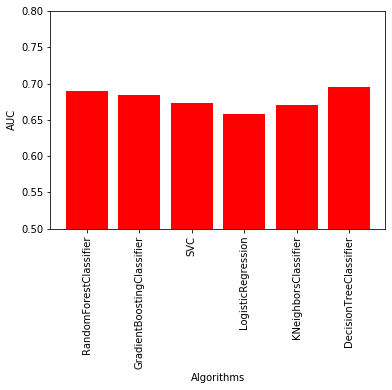

In [86]:
plt.bar(np.arange(len(roc_auc_scores)), roc_auc_scores, color='r', label='алгоритмы')
plt.xticks(np.arange(len(roc_auc_scores)), alg)
plt.xticks(rotation=90) 
plt.ylim([0.5, 0.8])
plt.xlabel('Algorithms')
plt.ylabel('AUC')

Как видим максимальную точность по метрике ROC AUC score показывает DecisionTreeClassifier.

Это хорошо, так как можно построить деревья, которые будут нативно понятны заказчику.

Можно увеличить значение точности, используя все признаки, но это может ухудшить обощающую способность алгоритма, в любом случае лучший подход, будет заметен на продакшене.

Я пробывал использывать Staking, но метрика оказалась хуже.

Выводы:
    Нам была предоставлен датасет для прогнозирования оттока абонентов телеком компании. Качество датасета было высоким, значительных изменений в инфраструктуру сбора данных можно не вносить, за исключением приведения числовых данных в правильный тип (пример проблемы - TotalCharges).
    Мной было сделано преобразование данных: категориальные признаки в номинальный вид, числовые в номинальный.
    На основание полученного датасета с новыми признаками были построенны несколько моделей, где лучшее качество показала модель DecisionTreeClassifier.   
    Прогнозирование оттока важная задача, но на основание выводов из второго раздела, можно быть уверенным в том, что компания испытывает ряд технических трудностей с качеством предоставляемой услуги интернет или ее ценой (как оптики так и DSL). И эти проблемы критическим образов влияют на показатели оттока по всем сегментам клиентов. 
    Положительным моментом является большой процент "постоянных" клиентов и степень проникновения услуги телефонии.